In [1]:
# Importando bibliotecas necessárias

import matplotlib.pyplot as plt  # Para plotagem de gráficos
import numpy as np  # Para operações numéricas e arrays multidimensionais
import math  # Funções matemáticas
import random  # Geração de números aleatórios
import scipy as sc  # Biblioteca científica para computação numérica
from scipy import special  # Funções especiais matemáticas
#plt.rcParams['text.usetex'] = True  # Permite usar LaTeX para renderizar texto nos gráficos
from numba import jit, vectorize, njit  # Compilador JIT (Just-In-Time) para otimizar o código
from numba import njit, prange # Compilador JIT com suporte a paralelização
import time  # Para medir o tempo de execução
import matplotlib.pyplot as plt # Importando novamente, o que é redundante
from scipy.optimize import curve_fit  # Para ajuste de curvas a dados

[[np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float6

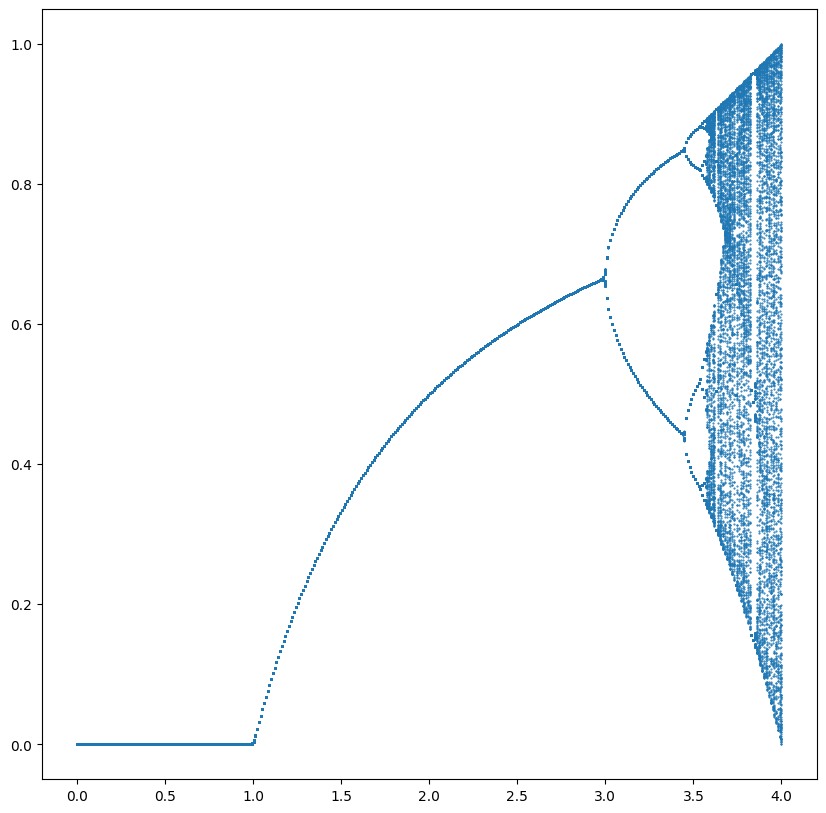

In [2]:
# Gera um array 'mu' com 400 valores igualmente espaçados entre 0 e 4.
mu = np.linspace(0, 4, 400)

# Inicializa uma lista vazia 'x' para armazenar os resultados.
x = []

# Loop externo que itera sobre cada valor em 'mu'.
for j in prange(len(mu)):
    # Inicializa 'x0' com um número aleatório entre 0 e 1.
    x0 = random.random()

    # Loop para iterar 200 vezes, aplicando a função logística.
    for i in prange(200):
        # Calcula o próximo valor de 'x1' usando a função logística.
        x1 = mu[j] * x0 * (1.0 - x0)
        # Atualiza 'x0' com o valor de 'x1'.
        x0 = x1

    # Loop para iterar 300 vezes, aplicando a função logística e armazenando os resultados.
    for i in prange(300):
        # Calcula o próximo valor de 'x1' usando a função logística.
        x1 = mu[j] * x0 * (1.0 - x0)
        # Atualiza 'x0' com o valor de 'x1'.
        x0 = x1
        # Adiciona o par (x0, mu[j]) à lista 'x'.
        x.append([x0, mu[j]])

# Imprime a lista 'x' (opcional, pode gerar uma saída muito longa).
print(x)

# Converte a lista 'x' em um array NumPy para facilitar a plotagem.
x = np.array(x)

# Cria uma figura com tamanho 20x20 polegadas.
plt.figure(figsize=(10, 10))

# Plota os pontos (mu, x) como pontos pequenos.
plt.plot(x[:, 1], x[:, 0], '.', markersize=1)

# Exibe o gráfico.
plt.show()

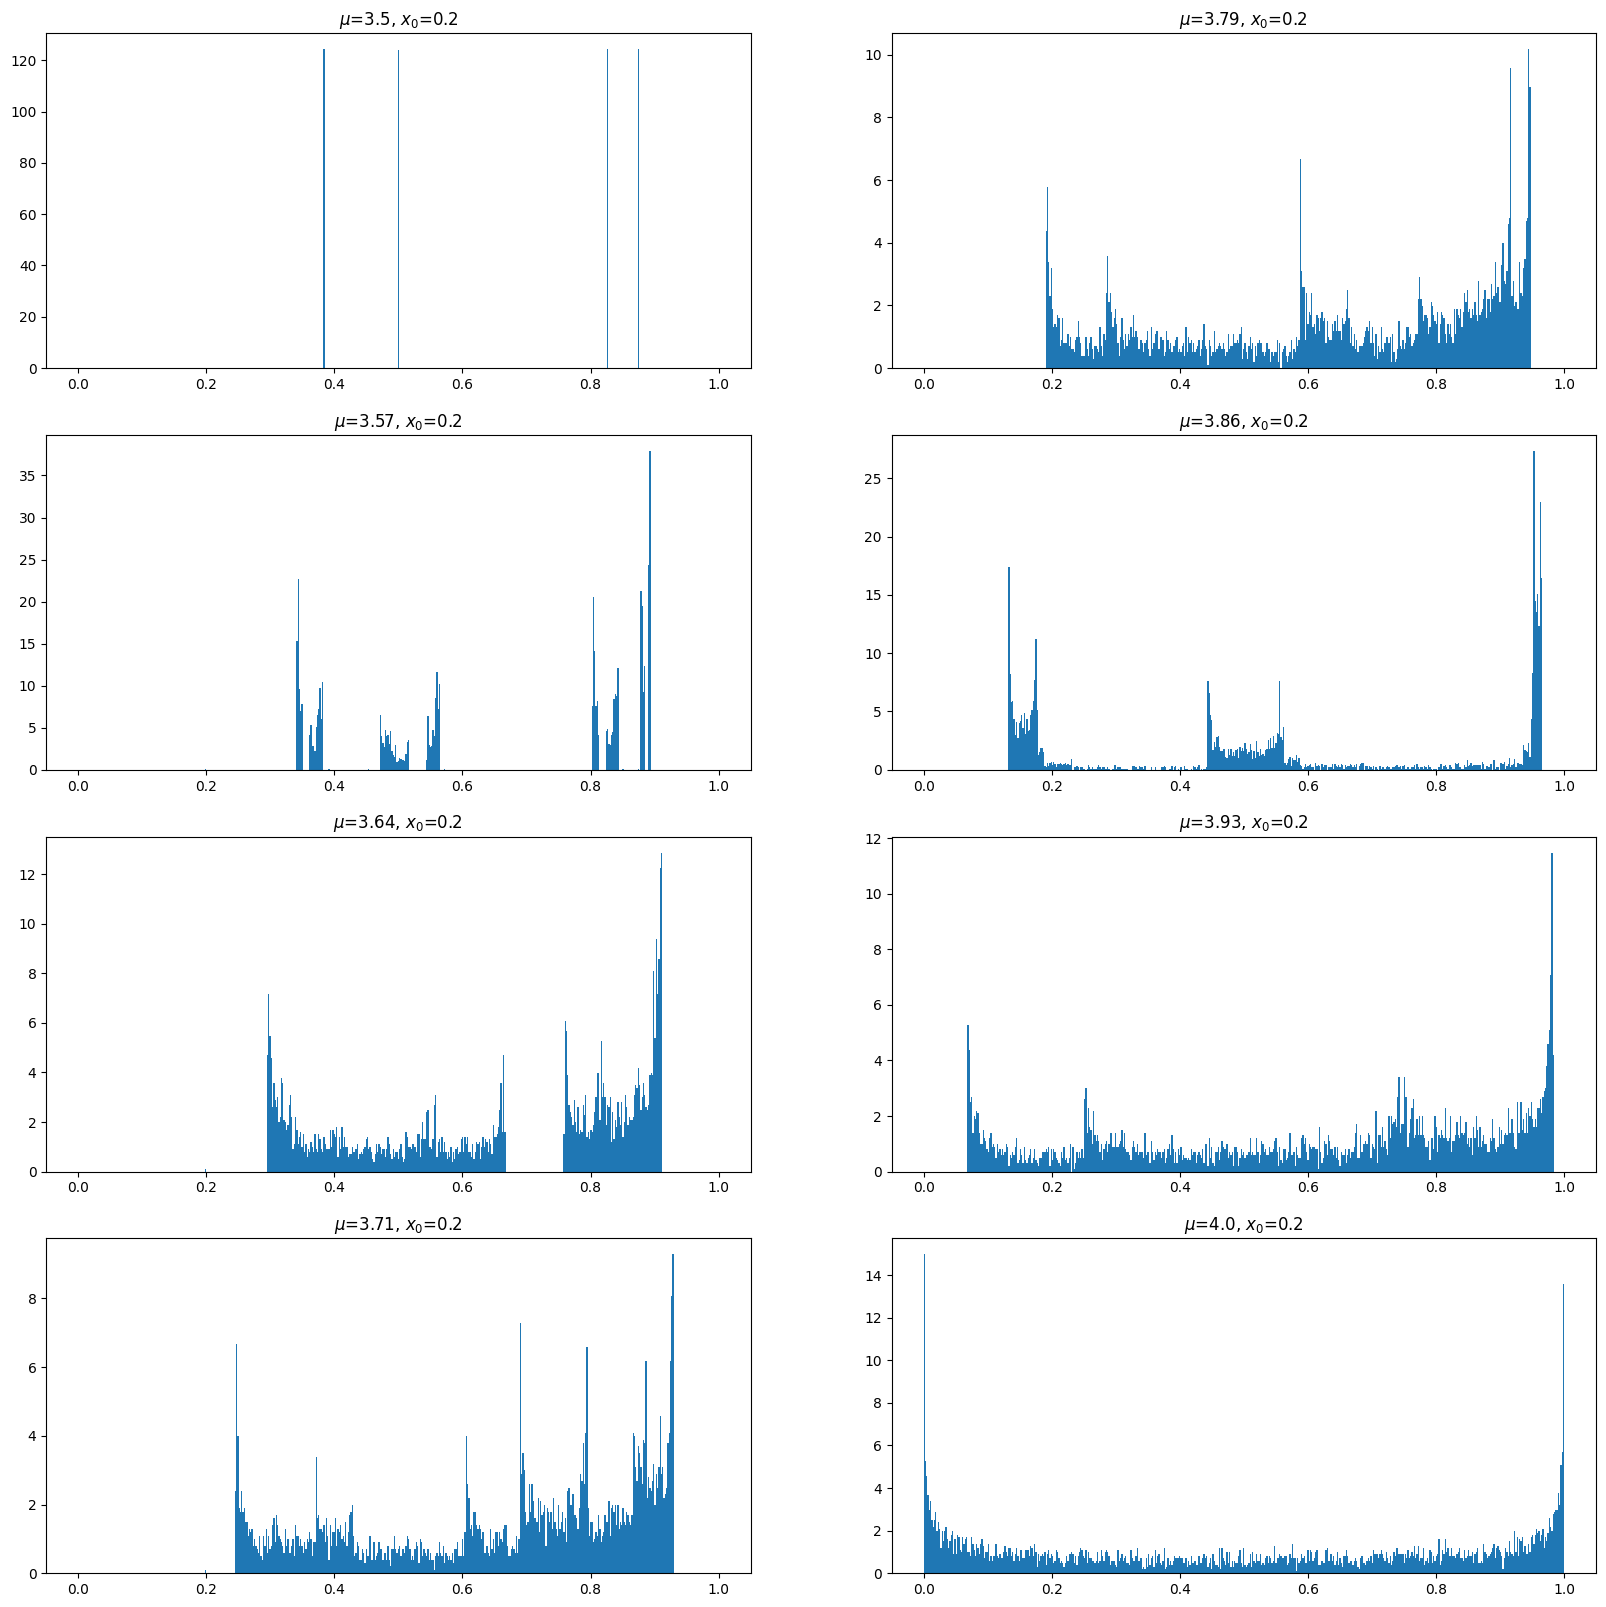

In [3]:
# Gera um array 'mu' com 8 valores igualmente espaçados entre 3.5 e 4.
mu = np.linspace(3.5, 4, 8)

# Cria uma figura e uma grade de subplots 4x2 com tamanho 20x20 polegadas.
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# Inicializa uma lista vazia 'x' para armazenar os resultados.
x = []

# Gera um array 'line' com 500 valores igualmente espaçados entre 0 e 1, para usar como bins no histograma.
line = np.linspace(0, 1, 500)

# Inicializa 'x0' com um valor aleatório entre 0 e 1.
x0 = random.random()

# Loop externo que itera sobre as linhas da grade de subplots.
for j in prange(4):
    # Loop interno que itera sobre as colunas da grade de subplots.
    for k in prange(2):
        # Reinicializa 'x0' com 0.2 para cada subplot.
        x0 = 0.2
        # Reinicializa a lista 'x' com o valor inicial 'x0'.
        x = [x0]
        # Loop para iterar 5000 vezes, aplicando a função logística.
        for i in prange(5000):
            # Calcula o próximo valor de 'x1' usando a função logística.
            x1 = mu[j + k * 4] * x0 * (1.0 - x0)
            # Atualiza 'x0' com o valor de 'x1'.
            x0 = x1
            # Adiciona o valor de 'x0' à lista 'x'.
            x.append(x0)
        # Converte a lista 'x' em um array NumPy.
        x = np.array(x)
        # Define o título do subplot com o valor de 'mu' e o valor inicial de 'x0'.
        axs[j, k].set_title('$\mu$=' + str(round(mu[j + k * 4], 2)) + ', $x_{0}$=0.2')
        # Plota o histograma dos valores de 'x' no subplot, usando 'line' como bins e normalizando a frequência.
        axs[j, k].hist(x, line, density=True)

# Gera um array 'line' com 100 valores igualmente espaçados entre 0 e 1 (não utilizado na plotagem final).
line = np.linspace(0, 1, 100)

# Converte a lista 'x' em um array NumPy (redundante, já feito dentro dos loops).
x = np.array(x)

# Exibe a figura com os subplots.
plt.show()

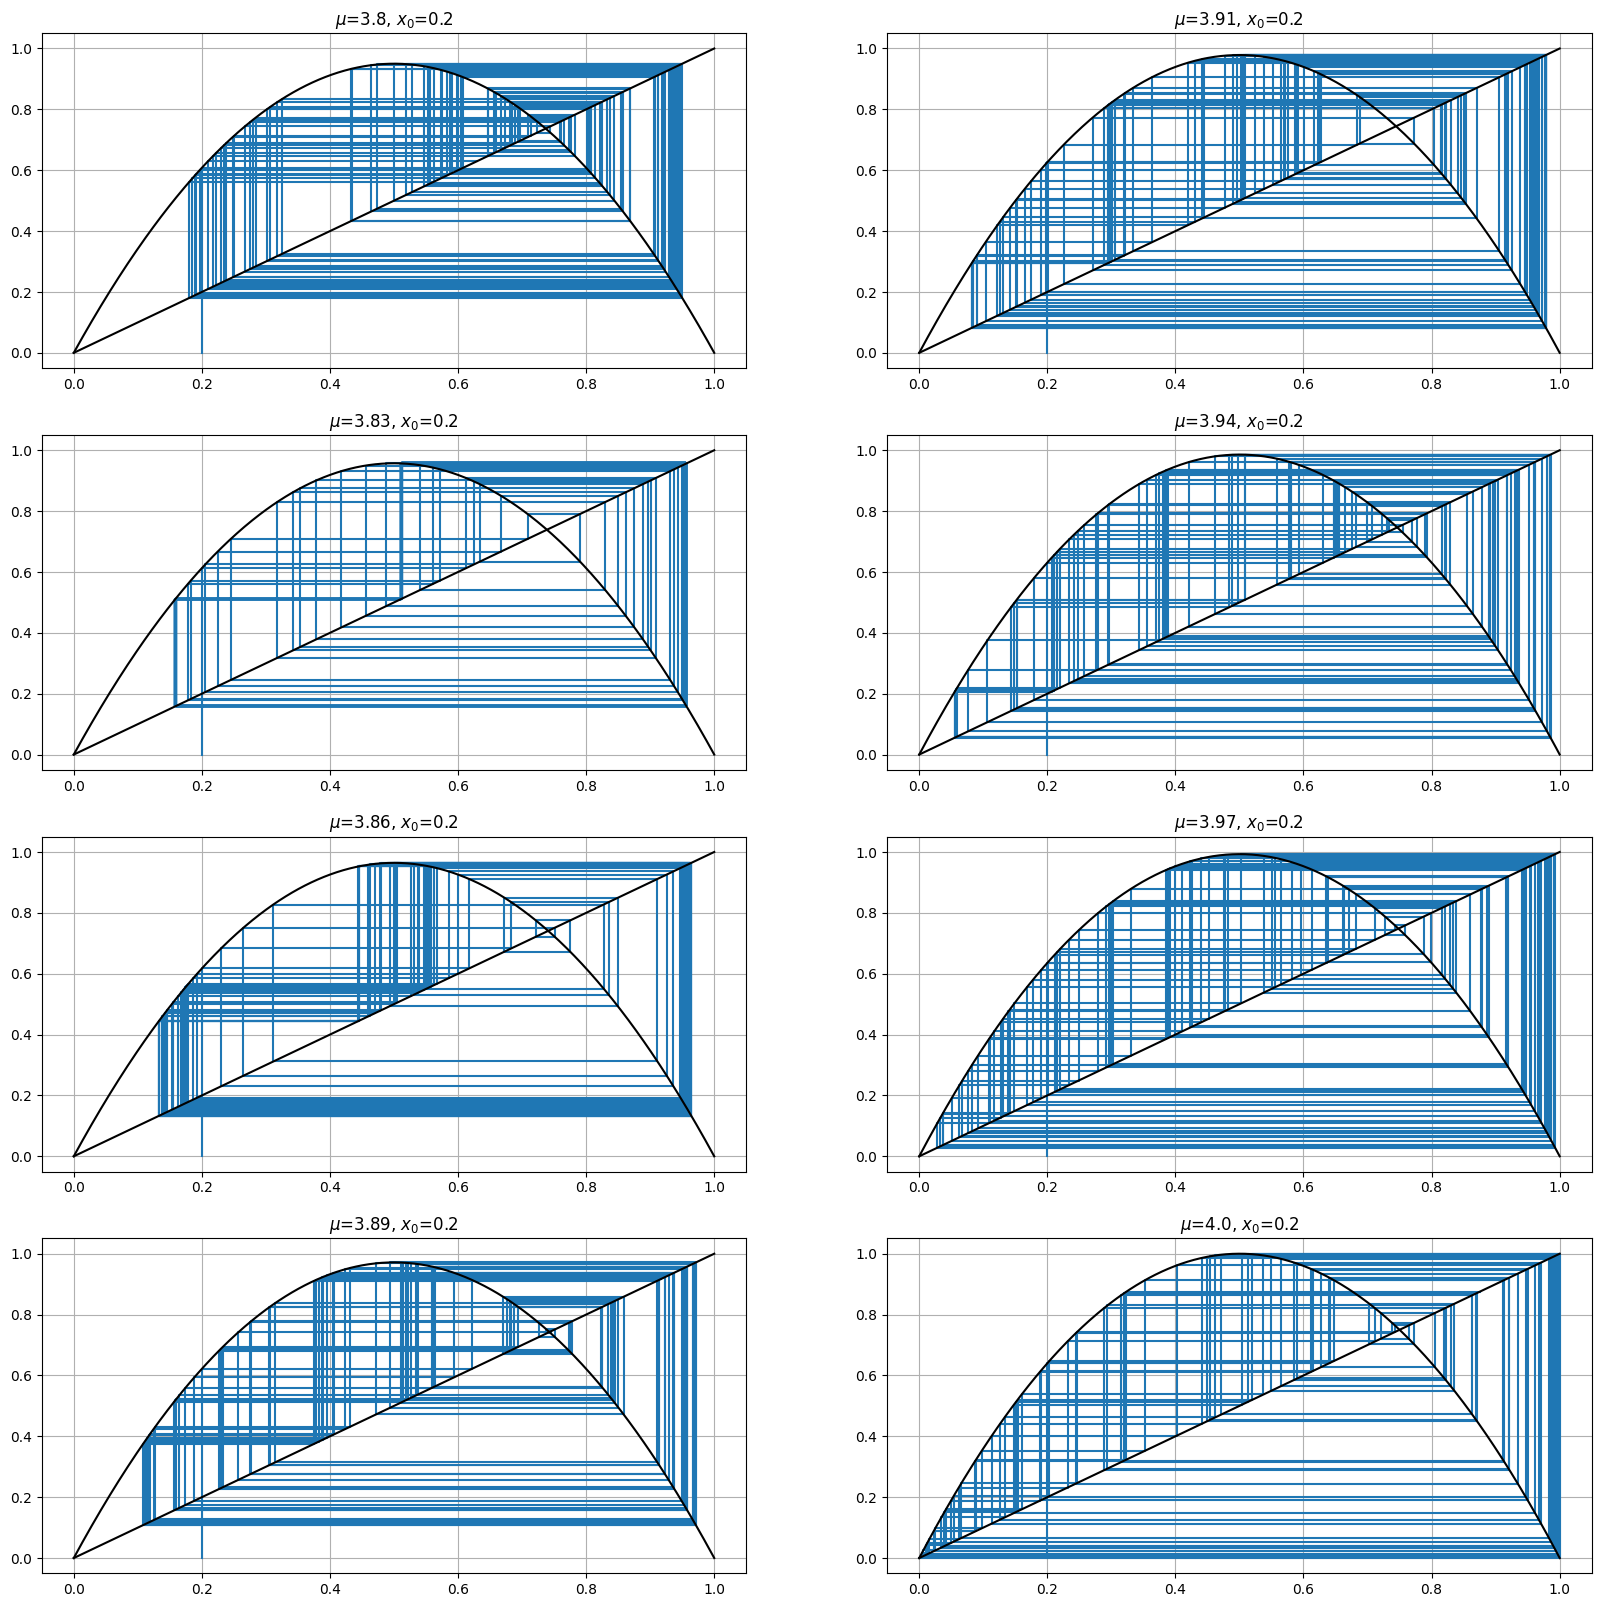

In [4]:
# Gera um array 'mu' com 8 valores igualmente espaçados entre 3.8 e 4.
mu = np.linspace(3.8, 4, 8)

# Cria uma figura e uma grade de subplots 4x2 com tamanho 20x20 polegadas.
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# Gera um array 'line' com 500 valores igualmente espaçados entre 0 e 1, usado para plotar linhas de referência.
line = np.linspace(0, 1, 500)

# Loop externo que itera sobre as linhas da grade de subplots.
for j in prange(4):
    # Loop interno que itera sobre as colunas da grade de subplots.
    for k in prange(2): # Note the corrected Prange to prange
        # Inicializa 'x0' com 0.2.
        x0 = 0.2

        # Inicializa a lista 'x' com o valor inicial [x0, 0.0].
        x = [[x0, 0.0]]

        # Loop para iterar 100 vezes, aplicando a função logística.
        for i in prange(100):
            # Calcula o próximo valor de 'x1' usando a função logística.
            x1 = mu[j + k * 4] * x0 * (1.0 - x0)

            # Armazena o valor de x1 em f0.
            f0 = x1

            # Adiciona o par [x0, x1] à lista 'x'.
            x.append([x0, x1])

            # Adiciona o par [f0, x1] à lista 'x'. This line doubles the points, creating a zig-zag effect.
            x.append([f0, x1])

            # Atualiza 'x0' com o valor de 'x1'.
            x0 = x1

        # Converte a lista 'x' em um array NumPy.
        x = np.array(x)

        # Define o título do subplot com o valor de 'mu' e o valor inicial de 'x0'.
        axs[j, k].set_title('$\mu$=' + str(round(mu[j + k * 4], 2)) + ', $x_{0}$=0.2')

        # Plota os pontos (x0, x1) no subplot.
        axs[j, k].plot(x[:, 0], x[:, 1])

        # Plota a função logística f(x) = mu * x * (1 - x) no subplot.
        axs[j, k].plot(line, mu[j + k * 4] * line * (1.0 - line), color='k')

        # Plota a linha y = x no subplot.
        axs[j, k].plot(line, line, color='k')

        # Adiciona uma grade ao subplot.
        axs[j, k].grid()

# Exibe a figura com os subplots.
plt.show()